# 1.3.1.1 单品种各龄段预测的Leslie模型

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt  

In [3]:
I = np.array([0,0,2/30,3/30,5/30,7/30,8/30,1,1])
r = 100
beta = [1,.4,.5,.5,.5,.7,.9,.9]
KM = 500
init = [10*(.5**i) for i in range(9)]

In [4]:
def K(P):
    return I @ P

def F(k):
    return r*(1-k/KM)

def S(x,k):
    return beta[x]*(1 if x < 3 else (1-k/KM))

def L(P):
    k = K(P)
    A = np.zeros((9,9))
    for i in range(8):
        A[i+1,i] = S(i,k)
    A[0,8] = F(k)
    return A

In [26]:
df = pd.DataFrame(columns=[*range(1,10)])
df.loc[0] = init
for i in range(200):
    P = df.loc[len(df)-1]
    P = L(P) @ P
    df.loc[len(df)] = P
df

,1,2,3,4,5,6,7,8,9
0,10.000000,5.000000,2.500000,1.250000,0.625000,0.312500,0.156250,0.078125,0.039062
1,3.901347,10.000000,2.000000,1.250000,0.624215,0.312108,0.218475,0.140448,0.070224
2,7.012535,3.901347,4.000000,1.000000,0.624120,0.311668,0.218168,0.196351,0.126226
3,12.599232,7.012535,1.560539,2.000000,0.499076,0.311483,0.217765,0.195988,0.176389
4,17.607516,12.599232,2.805014,0.780269,0.998219,0.249094,0.217650,0.195639,0.176075
...,...,...,...,...,...,...,...,...,...
196,1063.787223,835.500053,249.352309,105.551103,45.143981,24.768910,10.393853,25.460811,7.774425
197,658.511013,1063.787223,334.200021,124.676154,44.702060,19.118975,14.685870,7.923441,19.409283
198,1638.500596,658.511013,425.514889,167.100011,52.624806,18.868381,11.297953,11.157819,6.019958
199,507.552707,1638.500596,263.404405,212.757445,70.442405,22.184427,11.135773,8.572943,8.466609


In [24]:
df['egg'] = df[1] + df[2]
df['junior larvae'] = df[3] + df[4] + df[5]
df['senior larvae'] = df[6] + df[7]
df['adult'] = df[8] + df[9]
df

,1,2,3,4,5,6,7,8,9,egg,junior larvae,senior larvae,adult
0,10.000000,5.000000,2.500000,1.250000,0.625000,0.312500,0.156250,0.078125,0.039062,15.000000,4.375000,0.468750,0.117188
1,3.901347,10.000000,2.000000,1.250000,0.624215,0.312108,0.218475,0.140448,0.070224,13.901347,3.874215,0.530583,0.210673
2,7.012535,3.901347,4.000000,1.000000,0.624120,0.311668,0.218168,0.196351,0.126226,10.913882,5.624120,0.529836,0.322577
3,12.599232,7.012535,1.560539,2.000000,0.499076,0.311483,0.217765,0.195988,0.176389,19.611767,4.059615,0.529248,0.372377
4,17.607516,12.599232,2.805014,0.780269,0.998219,0.249094,0.217650,0.195639,0.176075,30.206748,4.583503,0.466744,0.371714
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1063.787223,835.500053,249.352309,105.551103,45.143981,24.768910,10.393853,25.460811,7.774425,1899.287276,400.047393,35.162763,33.235236
197,658.511013,1063.787223,334.200021,124.676154,44.702060,19.118975,14.685870,7.923441,19.409283,1722.298236,503.578236,33.804845,27.332724
198,1638.500596,658.511013,425.514889,167.100011,52.624806,18.868381,11.297953,11.157819,6.019958,2297.011608,645.239706,30.166334,17.177777
199,507.552707,1638.500596,263.404405,212.757445,70.442405,22.184427,11.135773,8.572943,8.466609,2146.053303,546.604255,33.320200,17.039552


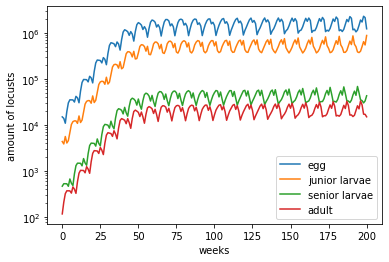

In [25]:
for age in ['egg','junior larvae','senior larvae','adult']:
    plt.plot([*range(len(df))],df[age]*10**3,label=age)
plt.yscale('log')
plt.xlabel('weeks')
plt.ylabel('amount of locusts')
plt.legend()